In [10]:
import pandas as pd
import numpy as np

In [11]:
# Drug sensitivity
pharmaco_profile = pd.read_csv('../bladder_cell_line/BLCA_IC_Tue Jul  7 09_26_30 2020.csv')
print(pharmaco_profile.head())
pivot_pharmaco_profile_ic50 = pharmaco_profile.pivot(index='Cell line name', columns='Drug Id', values='IC50')
#pivot_pharmaco_profile_auc = pharmaco_profile.pivot(index='Cell line name', columns='Drug Id', values='AUC')
pivot_pharmaco_profile_zscore = pharmaco_profile.pivot(index='Cell line name', columns='Drug Id', values='Z score')
# print(pivot_pharmaco_profile.head())

      Drug name  Drug Id Cell line name  Cosmic sample Id TCGA classification  \
0  Camptothecin     1003           5637            687452                BLCA   
1  Camptothecin     1003            RT4            687455                BLCA   
2  Camptothecin     1003          SW780            687457                BLCA   
3  Camptothecin     1003         TCCSUP            687459                BLCA   
4  Camptothecin     1003        UM-UC-3            724838                BLCA   

              Tissue Tissue sub-type      IC50       AUC  Max conc      RMSE  \
0  urogenital_system         bladder -2.314530  0.849668       0.1  0.081395   
1  urogenital_system         bladder -2.798417  0.842073       0.1  0.083943   
2  urogenital_system         bladder -1.647826  0.892707       0.1  0.080465   
3  urogenital_system         bladder -1.865504  0.866922       0.1  0.078944   
4  urogenital_system         bladder -3.862462  0.736721       0.1  0.092083   

    Z score Dataset version  
0 

In [12]:
# Drug info
drug_info = pd.read_excel('../bladder_cell_line/gdsc_drugs.xls', sheet_name='Sheet1')
drug_info = drug_info.set_index('drug_id')
print(drug_info.head())

          drug_name                                           synonyms  \
drug_id                                                                  
1559     Luminespib                 AUY922, VER-52296,NVP-AUY922,  AUY   
1058     Pictilisib                         GDC-0941, GDC0941, RG-7621   
1088     Irinotecan  Camptosar, (+)-Irinotecan, Irinotecanum, irino...   
1549      Sapitinib                                            AZD8931   
1558      Lapatinib                                     Tykerb, Tyverb   

                              pathway_name             targets   pubchem  
drug_id                                                                   
1559     Protein stability and degradation               HSP90  10096043  
1058                   PI3K/MTOR signaling      PI3K (class 1)  17755052  
1088                       DNA replication                TOP1     60838  
1549                        EGFR signaling  EGFR, ERBB2, ERBB3  11488320  
1558                        EGF

In [13]:
cell_line_mapping = pd.read_csv('../data/BLCA_CCLE.csv')
cell_line_mapping = cell_line_mapping.set_index(keys='cell_line')
cell_line_set = cell_line_mapping.index
print(cell_line_mapping.head())

           ATF2  ATM  ELK1  FOS  FRS2  GAB1  GRB2  JUN  PKC  RAF  ...  PLCG  \
cell_line                                                         ...         
VM-CUB-1      0    0     0    0     0     0     0    0    0    0  ...     0   
SW1710        0 -200     0 -200     0     0     0    0    0    0  ...     0   
UM-UC-3       0  -50  -200    0     0     0     0    0    0 -200  ...     0   
BFTC-905      0    0     0    0     0  -200     0    0    0    0  ...     0   
HT-1376       0    0     0    0     0     0     0    0  200  200  ...     0   

           PPP2CA  PTEN  RAS  SOS  SPRY  EGFR  ERK  JNK  MEK1_2  
cell_line                                                        
VM-CUB-1        0     0    0    0     0     0   20    0       0  
SW1710          0     0    0 -200  -200     0    0    0       0  
UM-UC-3         0  -200   20    0     0     0    0    0       0  
BFTC-905        0     0   20    0     0     0    0    0       0  
HT-1376         0     0 -200    0     0     0  200

In [14]:
# node info
grieco_original_network_table = pd.read_csv('../data/Grieco_table_for_original_network.tsv', sep='\t')
grieco_original_network_table = grieco_original_network_table.set_index(keys='node')
print(grieco_original_network_table.head())
# %%

reverse_controllability_cell_line = pd.DataFrame(0, index=cell_line_set, columns=['C0', 'C1', 'C2', 'C3', 'score1', 'score2'])
for cell_line in cell_line_mapping.index:
    for node in cell_line_mapping.columns:
        val = cell_line_mapping.loc[cell_line][node]
        if val != 0:
            node_class = grieco_original_network_table.loc[node]['Class']
            reverse_controllability_cell_line.loc[cell_line][node_class] += 1
print(reverse_controllability_cell_line.head())

       Class  Canalizing  UnreachableEffective   FFL2   FFL3   FFL4   FFL5  \
node                                                                         
EGFR      C2       False                  True   True   True  False  False   
GADD45    C3       False                 False  False  False  False  False   
MAX       C1       False                 False   True   True   True   True   
TGFBR     C3        True                 False  False  False  False  False   
FOS       C0       False                 False  False  False  False  False   

         FFL6   FFL7  FBL  
node                       
EGFR    False  False    0  
GADD45  False  False    0  
MAX      True   True    0  
TGFBR   False  False    0  
FOS     False  False    0  
           C0  C1  C2  C3  score1  score2
cell_line                                
VM-CUB-1    0   4   1   2       0       0
SW1710      2   5   0   2       0       0
UM-UC-3     3   3   0   3       0       0
BFTC-905    1   5   0   4       0       0
HT-13

In [15]:
reverse_controllability_cell_line['score1'] = reverse_controllability_cell_line['C0'].map(lambda x: -1*x) + reverse_controllability_cell_line['C1'].map(lambda x: -2*x)+reverse_controllability_cell_line['C2'].map(lambda x: 1*x)+reverse_controllability_cell_line['C3'].map(lambda x: 2*x)
reverse_controllability_cell_line['score2'] = reverse_controllability_cell_line['C1'].map(lambda x: -1*x)+reverse_controllability_cell_line['C2'].map(lambda x: x)+reverse_controllability_cell_line['C3'].map(lambda x: x)
print(reverse_controllability_cell_line.head())
# reverse_controllability_cell_line.to_csv('../bladder_cell_line/bladder_reverse_controllability_cell_line.csv')

           C0  C1  C2  C3  score1  score2
cell_line                                
VM-CUB-1    0   4   1   2      -3      -1
SW1710      2   5   0   2      -8      -3
UM-UC-3     3   3   0   3      -3       0
BFTC-905    1   5   0   4      -3      -1
HT-1376     3   2   1   4       2       3


In [16]:
tmp_ic50 = pd.merge(reverse_controllability_cell_line, pivot_pharmaco_profile_ic50, left_index=True, right_index=True, how='left')
#tmp_auc = pd.merge(reverse_controllability_cell_line, pivot_pharmaco_profile_auc, left_index=True, right_index=True, how='left')
tmp_zscore = pd.merge(reverse_controllability_cell_line, pivot_pharmaco_profile_zscore, left_index=True, right_index=True, how='left')
# print(tmp.head())

In [17]:
pearson_ic50 = tmp_ic50.corr()
pearson_ic50.drop(['C0', 'C1', 'C2', 'C3', 'score1', 'score2'], inplace=True)
pearson_ic50 = pearson_ic50.filter(items=['C0', 'C1', 'C2', 'C3', 'score1', 'score2'])
kendall_ic50 = tmp_ic50.corr(method='kendall')
kendall_ic50.drop(['C0', 'C1', 'C2', 'C3', 'score1', 'score2'], inplace=True)
kendall_ic50 = kendall_ic50.filter(items=['C0', 'C1', 'C2', 'C3', 'score1', 'score2'])
spearman_ic50 = tmp_ic50.corr(method='spearman')
spearman_ic50.drop(['C0', 'C1', 'C2', 'C3', 'score1', 'score2'], inplace=True)
spearman_ic50 = spearman_ic50.filter(items=['C0', 'C1', 'C2', 'C3', 'score1', 'score2'])
#pearson_auc = tmp_auc.corr()
#pearson_auc.drop(['C0', 'C1', 'C2', 'C3', 'irreversibility_score'], inplace=True)
#pearson_auc = pearson_auc.filter(items=['C0', 'C1', 'C2', 'C3', 'irreversibility_score'])
#kendall_auc = tmp_auc.corr(method='kendall')
#kendall_auc.drop(['C0', 'C1', 'C2', 'C3', 'irreversibility_score'], inplace=True)
#kendall_auc = kendall_auc.filter(items=['C0', 'C1', 'C2', 'C3', 'irreversibility_score'])
#spearman_auc = tmp_auc.corr(method='spearman')
#spearman_auc.drop(['C0', 'C1', 'C2', 'C3', 'irreversibility_score'], inplace=True)
#spearman_auc = spearman_auc.filter(items=['C0', 'C1', 'C2', 'C3', 'irreversibility_score'])
pearson_zscore = tmp_zscore.corr()
pearson_zscore.drop(['C0', 'C1', 'C2', 'C3', 'score1', 'score2'], inplace=True)
pearson_zscore = pearson_zscore.filter(items=['C0', 'C1', 'C2', 'C3', 'score1', 'score2'])
kendall_zscore = tmp_zscore.corr(method='kendall')
kendall_zscore.drop(['C0', 'C1', 'C2', 'C3', 'score1', 'score2'], inplace=True)
kendall_zscore = kendall_zscore.filter(items=['C0', 'C1', 'C2', 'C3', 'score1', 'score2'])
spearman_zscore = tmp_zscore.corr(method='spearman')
spearman_zscore.drop(['C0', 'C1', 'C2', 'C3', 'score1', 'score2'], inplace=True)
spearman_zscore = spearman_zscore.filter(items=['C0', 'C1', 'C2', 'C3', 'score1', 'score2'])
#print(pearson.head())

In [18]:
#pearson = pd.merge(pearson, drug_info,left_index=True, right_index=True, how='left')
#kendall = pd.merge(kendall, drug_info,left_index=True, right_index=True, how='left')
#spearman = pd.merge(spearman, drug_info,left_index=True, right_index=True, how='left')

#pearson.to_csv('../bladder_cell_line/blca_corr_auc_pearson.csv')
#kendall.to_csv('../bladder_cell_line/blca_corr_auc_kendall.csv')
#spearman.to_csv('../bladder_cell_line/blca_corr_auc_spearman.csv')

In [19]:
# import scipy
from scipy.stats import kendalltau, pearsonr, spearmanr
def kendall_pval(x,y):
    return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

pearson_p_ic50 = tmp_ic50.corr(method=pearsonr_pval)
pearson_p_ic50.drop(['C0', 'C1', 'C2', 'C3', 'score1', 'score2'], inplace=True)
pearson_p_ic50 = pearson_p_ic50.filter(items=['C0', 'C1', 'C2', 'C3', 'score1', 'score2'])
kendall_p_ic50 = tmp_ic50.corr(method=kendall_pval)
kendall_p_ic50.drop(['C0', 'C1', 'C2', 'C3', 'score1', 'score2'], inplace=True)
kendall_p_ic50 = kendall_p_ic50.filter(items=['C0', 'C1', 'C2', 'C3', 'score1', 'score2'])
spearman_p_ic50 = tmp_ic50.corr(method=spearmanr_pval)
spearman_p_ic50.drop(['C0', 'C1', 'C2', 'C3', 'score1', 'score2'], inplace=True)
spearman_p_ic50 = spearman_p_ic50.filter(items=['C0', 'C1', 'C2', 'C3', 'score1', 'score2'])
# print(pearson.head())

#pearson_p_auc = tmp_auc.corr(method=pearsonr_pval)
#pearson_p_auc.drop(['C0', 'C1', 'C2', 'C3', 'irreversibility_score'], inplace=True)
#pearson_p_auc = pearson_p_auc.filter(items=['C0', 'C1', 'C2', 'C3', 'irreversibility_score'])
#kendall_p_auc = tmp_auc.corr(method=kendall_pval)
#kendall_p_auc.drop(['C0', 'C1', 'C2', 'C3', 'irreversibility_score'], inplace=True)
#kendall_p_auc = kendall_p_auc.filter(items=['C0', 'C1', 'C2', 'C3', 'irreversibility_score'])
#spearman_p_auc = tmp_auc.corr(method=spearmanr_pval)
#spearman_p_auc.drop(['C0', 'C1', 'C2', 'C3', 'irreversibility_score'], inplace=True)
#spearman_p_auc = spearman_p_auc.filter(items=['C0', 'C1', 'C2', 'C3', 'irreversibility_score'])
# print(pearson.head())

pearson_p_zscore = tmp_zscore.corr(method=pearsonr_pval)
pearson_p_zscore.drop(['C0', 'C1', 'C2', 'C3', 'score1', 'score2'], inplace=True)
pearson_p_zscore = pearson_p_zscore.filter(items=['C0', 'C1', 'C2', 'C3', 'score1', 'score2'])
kendall_p_zscore = tmp_zscore.corr(method=kendall_pval)
kendall_p_zscore.drop(['C0', 'C1', 'C2', 'C3', 'score1', 'score2'], inplace=True)
kendall_p_zscore = kendall_p_zscore.filter(items=['C0', 'C1', 'C2', 'C3', 'score1', 'score2'])
spearman_p_zscore = tmp_zscore.corr(method=spearmanr_pval)
spearman_p_zscore.drop(['C0', 'C1', 'C2', 'C3', 'score1', 'score2'], inplace=True)
spearman_p_zscore = spearman_p_zscore.filter(items=['C0', 'C1', 'C2', 'C3', 'score1', 'score2'])
# print(pearson.head())

pearson_ic50 = pd.merge(pearson_ic50, pearson_p_ic50,left_index=True, right_index=True, how='left', suffixes=('_corr', '_pval'))
kendall_ic50 = pd.merge(kendall_ic50, kendall_p_ic50,left_index=True, right_index=True, how='left', suffixes=('_corr', '_pval'))
spearman_ic50 = pd.merge(spearman_ic50, spearman_p_ic50,left_index=True, right_index=True, how='left', suffixes=('_corr', '_pval'))

pearson_ic50 = pd.merge(pearson_ic50, drug_info,left_index=True, right_index=True, how='left')
kendall_ic50 = pd.merge(kendall_ic50, drug_info,left_index=True, right_index=True, how='left')
spearman_ic50 = pd.merge(spearman_ic50, drug_info,left_index=True, right_index=True, how='left')

#pearson_auc = pd.merge(pearson_auc, pearson_p_auc,left_index=True, right_index=True, how='left', suffixes=('_corr', '_pval'))
#kendall_auc = pd.merge(kendall_auc, kendall_p_auc,left_index=True, right_index=True, how='left', suffixes=('_corr', '_pval'))
#spearman_auc = pd.merge(spearman_auc, spearman_p_auc,left_index=True, right_index=True, how='left', suffixes=('_corr', '_pval'))

#pearson_auc = pd.merge(pearson_auc, drug_info,left_index=True, right_index=True, how='left')
#kendall_auc = pd.merge(kendall_auc, drug_info,left_index=True, right_index=True, how='left')
#spearman_auc = pd.merge(spearman_auc, drug_info,left_index=True, right_index=True, how='left')

pearson_zscore = pd.merge(pearson_zscore, pearson_p_zscore,left_index=True, right_index=True, how='left', suffixes=('_corr', '_pval'))
kendall_zscore = pd.merge(kendall_zscore, kendall_p_zscore,left_index=True, right_index=True, how='left', suffixes=('_corr', '_pval'))
spearman_zscore = pd.merge(spearman_zscore, spearman_p_zscore,left_index=True, right_index=True, how='left', suffixes=('_corr', '_pval'))

pearson_zscore = pd.merge(pearson_zscore, drug_info,left_index=True, right_index=True, how='left')
kendall_zscore = pd.merge(kendall_zscore, drug_info,left_index=True, right_index=True, how='left')
spearman_zscore = pd.merge(spearman_zscore, drug_info,left_index=True, right_index=True, how='left')


#pearson_ic50.to_csv('../bladder_cell_line/blca_ccle_corr_pval_ic50_pearson.csv')
#kendall_ic50.to_csv('../bladder_cell_line/blca_ccle_corr_pval_ic50_kendall.csv')
#spearman_ic50.to_csv('../bladder_cell_line/blca_ccle_corr_pval_ic50_spearman.csv')
#pearson_auc.to_csv('../bladder_cell_line/blca_ccle_corr_pval_auc_pearson.csv')
#kendall_auc.to_csv('../bladder_cell_line/blca_ccle_corr_pval_auc_kendall.csv')
#spearman_auc.to_csv('../bladder_cell_line/blca_ccle_corr_pval_auc_spearman.csv')
#pearson_zscore.to_csv('../bladder_cell_line/blca_ccle_corr_pval_zscore_pearson.csv')
#kendall_zscore.to_csv('../bladder_cell_line/blca_ccle_corr_pval_zscore_kendall.csv')
#spearman_zscore.to_csv('../bladder_cell_line/blca_ccle_corr_pval_zscore_spearman.csv')

/home/jijoo/theor/lib/python3.5/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [28]:
# print(tmp.columns)
#print(tmp_ic50.info())
col_names = [str(x) for x in tmp_ic50.columns]
tmp_ic50.columns = col_names
#print(tmp_ic50.head())

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, VM-CUB-1 to TCCSUP
Columns: 187 entries, C0 to 2170
dtypes: float64(181), int64(6)
memory usage: 19.7+ KB
None
           C0  C1  C2  C3  score1  score2      1003      1004      1005  \
cell_line                                                                 
VM-CUB-1    0   4   1   2      -3      -1 -4.608755 -4.315227  1.724439   
SW1710      2   5   0   2      -8      -3 -0.540361 -4.812917  5.458492   
UM-UC-3     3   3   0   3      -3       0 -3.862462 -4.150085  2.695287   
BFTC-905    1   5   0   4      -3      -1 -4.359769 -6.333780  0.793120   
HT-1376     3   2   1   4       2       3  2.601380  0.396547  6.142723   

               1006  ...      2046      2047      2048      2096      2106  \
cell_line            ...                                                     
VM-CUB-1   0.142558  ...  1.902943  0.176828 -3.202279  2.749976  2.996610   
SW1710     2.724042  ...  4.344379  3.325501 -1.462805  3.899083  4.2144

In [34]:
score = 'score1'
meaningful = pearson_ic50[score+'_pval'] < 0.05
r, c = pearson_ic50.loc[meaningful].shape
drug_ids = [str(x) for x in pearson_ic50.loc[meaningful].index]
print(drug_ids)
print(r)
number_r = int(np.ceil(r / 3))
print(number_r)


['1916', '1924', '1940', '2170']
4
2


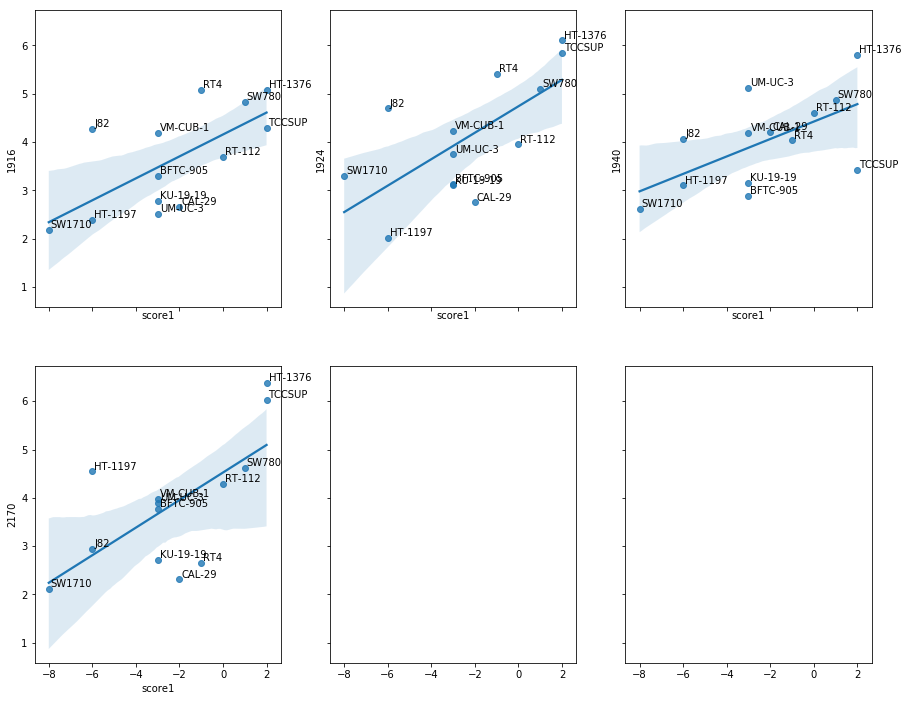

In [35]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def label_point(df,drug_id, ax):
    for i, point in df.iterrows():
        ax.annotate(i, xy = (point[score], point[str(drug_id)]),
                    xytext=(2,2), textcoords="offset points")

fig, axes = plt.subplots(number_r,3, sharex=True, sharey=True, figsize=(15,number_r * 6))
#drug_ids = ['1916', '1924', '2170', '1940']
for idx, ax in enumerate(axes.flat):        
    #print(ax)
    if idx < len(drug_ids):
        sns.regplot(x=tmp_ic50[score], y=tmp_ic50[drug_ids[idx]], ax=ax)
        label_point(tmp_ic50, drug_ids[idx], ax)
    else:
        break
    
#sns.lmplot(x='C3', y='1924', data=tmp_zscore)
#sns.lmplot(x='C3', y='2170', data=tmp_zscore)
#sns.lmplot(x='C3', y='1940', data=tmp_zscore)

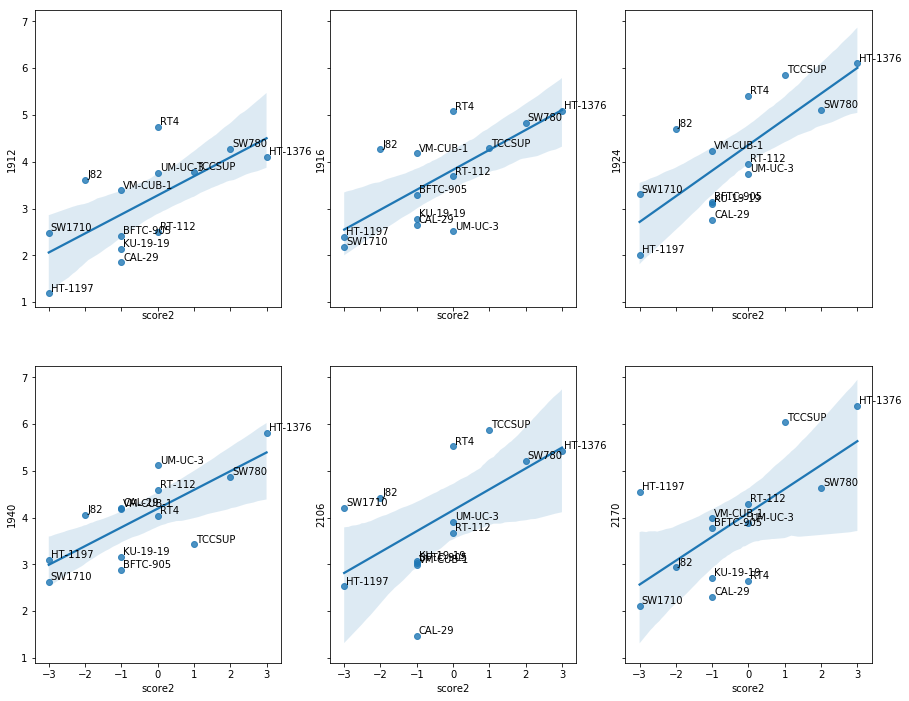

In [36]:
score = 'score2'
meaningful = pearson_ic50[score+'_pval'] < 0.05
r, c = pearson_ic50.loc[meaningful].shape
drug_ids = [str(x) for x in pearson_ic50.loc[meaningful].index]
#print(drug_ids)
#print(r)
number_r = int(np.ceil(r / 3))
#print(number_r)

def label_point(df,drug_id, ax):
    for i, point in df.iterrows():
        ax.annotate(i, xy = (point[score], point[str(drug_id)]),
                    xytext=(2,2), textcoords="offset points")

fig, axes = plt.subplots(number_r,3, sharex=True, sharey=True, figsize=(15,number_r * 6))
#drug_ids = ['1916', '1924', '2170', '1940']
for idx, ax in enumerate(axes.flat):        
    #print(ax)
    if idx < len(drug_ids):
        sns.regplot(x=tmp_ic50[score], y=tmp_ic50[drug_ids[idx]], ax=ax)
        label_point(tmp_ic50, drug_ids[idx], ax)
    else:
        break

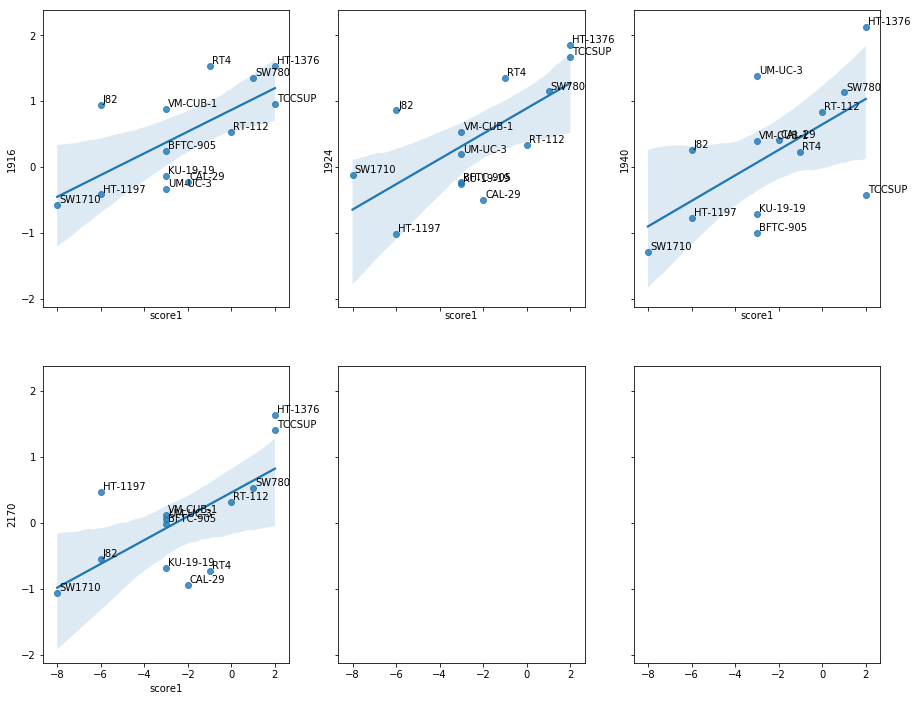

In [37]:
col_names = [str(x) for x in tmp_zscore.columns]
tmp_zscore.columns = col_names
score = 'score1'
meaningful = pearson_zscore[score+'_pval'] < 0.05
r, c = pearson_zscore.loc[meaningful].shape
drug_ids = [str(x) for x in pearson_zscore.loc[meaningful].index]
#print(drug_ids)
#print(r)
number_r = int(np.ceil(r / 3))
#print(number_r)
def label_point(df,drug_id, ax):
    for i, point in df.iterrows():
        ax.annotate(i, xy = (point[score], point[str(drug_id)]),
                    xytext=(2,2), textcoords="offset points")

fig, axes = plt.subplots(number_r,3, sharex=True, sharey=True, figsize=(15,number_r * 6))
#drug_ids = ['1916', '1924', '2170', '1940']
for idx, ax in enumerate(axes.flat):        
    #print(ax)
    if idx < len(drug_ids):
        sns.regplot(x=tmp_zscore[score], y=tmp_zscore[drug_ids[idx]], ax=ax)
        label_point(tmp_zscore, drug_ids[idx], ax)
    else:
        break

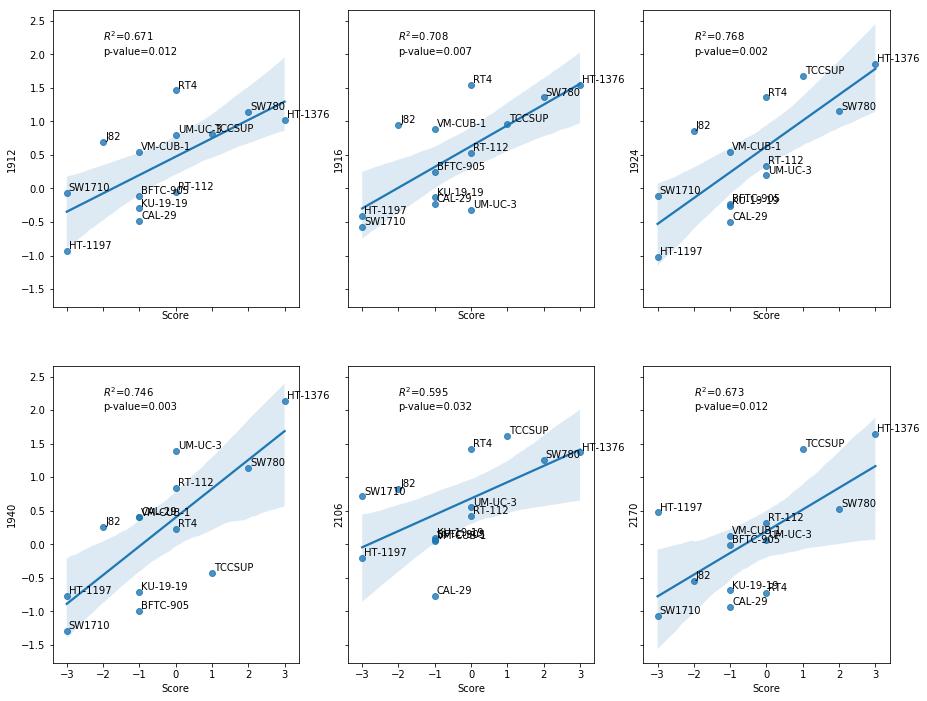

In [91]:
score = 'score2'
meaningful = pearson_zscore[score+'_pval'] < 0.05
r, c = pearson_zscore.loc[meaningful].shape
drug_ids = [str(x) for x in pearson_zscore.loc[meaningful].index]
#print(drug_ids)
#print(r)
number_r = int(np.ceil(r / 3))
#print(number_r)
def label_point(df,drug_id, ax):
    for i, point in df.iterrows():
        ax.annotate(i, xy = (point[score], point[str(drug_id)]),
                    xytext=(2,2), textcoords="offset points")

fig, axes = plt.subplots(number_r,3, sharex=True, sharey=True, figsize=(15,number_r * 6))
#drug_ids = ['1916', '1924', '2170', '1940']
for idx, ax in enumerate(axes.flat):        
    #print(ax)
    if idx < len(drug_ids):
        sns.regplot(x=tmp_zscore[score], y=tmp_zscore[drug_ids[idx]], ax=ax)
        label_point(tmp_zscore, drug_ids[idx], ax)
        ax.set_xlabel('Score')
        ax.text(-2, 2, 'p-value=%.3f'% pearson_zscore.loc[int(drug_ids[idx])][score+'_pval'])
        ax.text(-2, 2.2, r'$R^2$=%.3f'% pearson_zscore.loc[int(drug_ids[idx])][score+'_corr'])
    else:
        break

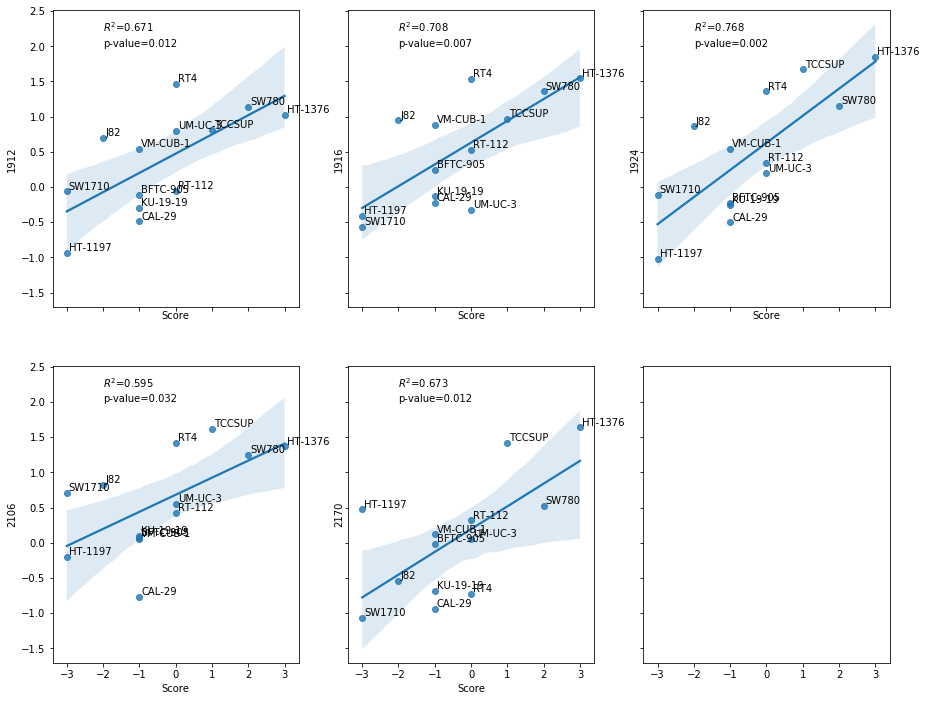

In [92]:
score = 'score2'
meaningful = pearson_zscore[score+'_pval'] < 0.05
r, c = pearson_zscore.loc[meaningful].shape
# drug_ids = [str(x) for x in pearson_zscore.loc[meaningful].index]
#print(drug_ids)
#print(r)
number_r = 2
#print(number_r)
def label_point(df,drug_id, ax):
    for i, point in df.iterrows():
        ax.annotate(i, xy = (point[score], point[str(drug_id)]),
                    xytext=(2,2), textcoords="offset points")

fig, axes = plt.subplots(2,3, sharex=True, sharey=True, figsize=(15,number_r * 6))
drug_ids = ['1912', '1916', '1924', '2106', '2170']
for idx, ax in enumerate(axes.flat):        
    #print(ax)
    if idx < len(drug_ids):
        sns.regplot(x=tmp_zscore[score], y=tmp_zscore[drug_ids[idx]], ax=ax)
        label_point(tmp_zscore, drug_ids[idx], ax)
        ax.set_xlabel('Score')
        ax.text(-2, 2, 'p-value=%.3f'% pearson_zscore.loc[int(drug_ids[idx])][score+'_pval'])
        ax.text(-2, 2.2, r'$R^2$=%.3f'% pearson_zscore.loc[int(drug_ids[idx])][score+'_corr'])
    else:
        break

In [84]:
print(tmp_zscore.head())

           C0  C1  C2  C3  score1  score2      1003      1004      1005  \
cell_line                                                                 
VM-CUB-1    0   4   1   2      -3      -1 -1.216824 -0.354817 -0.974488   
SW1710      2   5   0   2      -8      -3  0.765669 -0.594071  0.944825   
UM-UC-3     3   3   0   3      -3       0 -0.853162 -0.275429 -0.475470   
BFTC-905    1   5   0   4      -3      -1 -1.095495 -1.325191 -1.453189   
HT-1376     3   2   1   4       2       3  2.296610  1.910262  1.296522   

               1006  ...      2046      2047      2048      2096      2106  \
cell_line            ...                                                     
VM-CUB-1  -0.592274  ... -0.816805 -1.364527 -0.101152  0.094931  0.052317   
SW1710     0.564611  ...  0.730938  0.703686  0.778056  0.908491  0.713851   
UM-UC-3    0.370437  ...  0.640175  1.011253 -0.077041  0.749329  0.551245   
BFTC-905  -1.175819  ...  0.172215 -1.135889 -0.951755 -0.989590  0.069339   
HT-137

['1237', '1268', '1627', '1629', '1854']
2


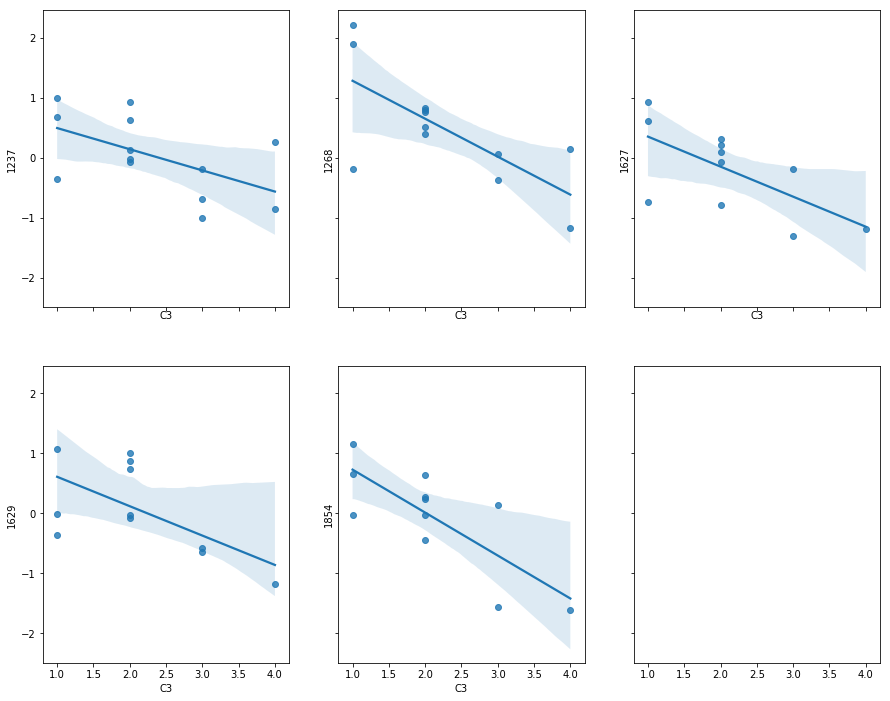

In [57]:
score = 'C3'
meaningful = pearson_zscore[score+'_pval'] < 0.05
r, c = pearson_zscore.loc[meaningful].shape
drug_ids = [str(x) for x in pearson_zscore.loc[meaningful].index]
print(drug_ids)
#print(r)
number_r = int(np.ceil(r / 3))
print(number_r)

def label_point(df,drug_id, ax):
    for i, point in df.iterrows():
        ax.annotate(i, xy = (point['C3'], point[str(drug_id)]),
                    xytext=(2,-2), textcoords="offset points")

fig, axes = plt.subplots(number_r,3, sharex=True, sharey=True, figsize=(15,number_r * 6))
#drug_ids = ['1916', '1924', '2170', '1940']
for idx, ax in enumerate(axes.flat):        
    #print(ax)
    if idx < len(drug_ids):
        sns.regplot(x=tmp_zscore[score], y=tmp_zscore[drug_ids[idx]], ax=ax)
#         label_point(tmp_zscore, drug_ids[idx], ax)
    else:
        break

['1054', '1093', '1131', '1191', '1199', '1250', '1375', '1449', '1512', '1576', '1624', '1830', '1838', '1862', '1916', '1924', '1940', '1998', '2106', '2107', '2109', '2170']
3


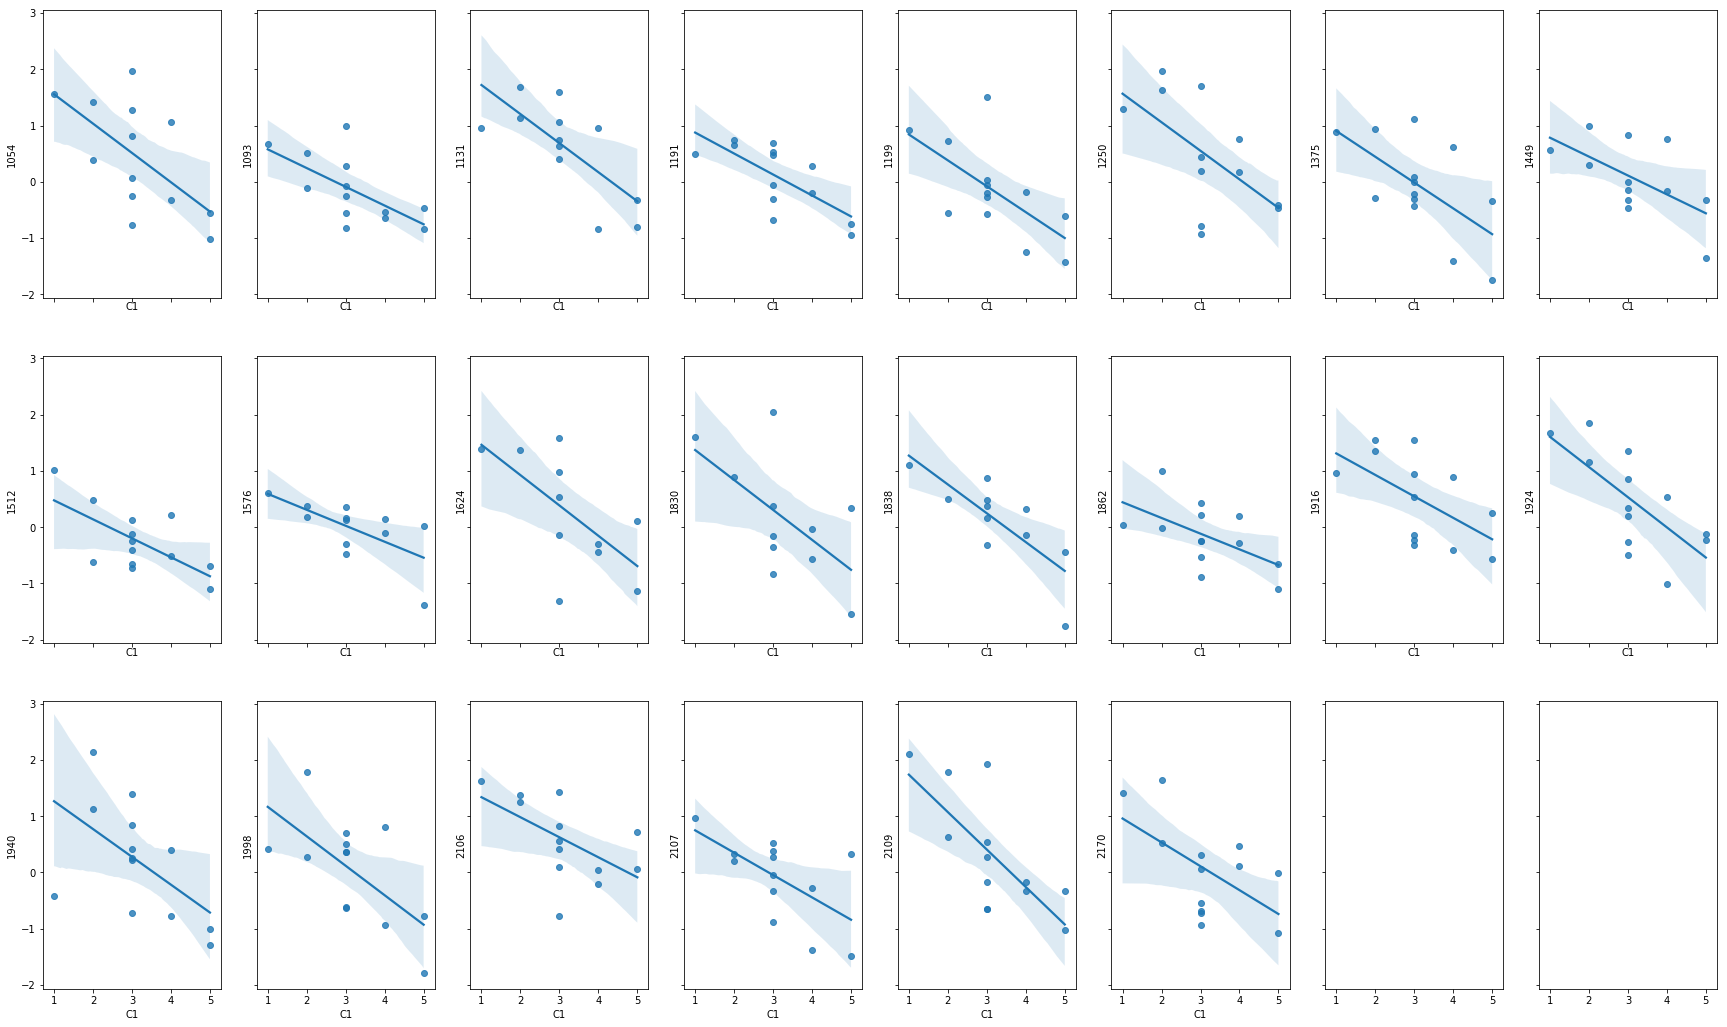

In [63]:
score = 'C1'
meaningful = pearson_zscore[score+'_pval'] < 0.05
r, c = pearson_zscore.loc[meaningful].shape
drug_ids = [str(x) for x in pearson_zscore.loc[meaningful].index]
print(drug_ids)
#print(r)
number_r = int(np.ceil(r / 8))
print(number_r)

def label_point(df,drug_id, ax):
    for i, point in df.iterrows():
        ax.annotate(i, xy = (point['C3'], point[str(drug_id)]),
                    xytext=(2,-2), textcoords="offset points")

fig, axes = plt.subplots(number_r,8, sharex=True, sharey=True, figsize=(30,number_r * 6))
#drug_ids = ['1916', '1924', '2170', '1940']
for idx, ax in enumerate(axes.flat):        
    #print(ax)
    if idx < len(drug_ids):
        sns.regplot(x=tmp_zscore[score], y=tmp_zscore[drug_ids[idx]], ax=ax)
#         label_point(tmp_zscore, drug_ids[idx], ax)
    else:
        break

['1401', '1441', '1553', '1560', '1708', '1809', '1873', '1926', '1932', '1933', '1936']
3


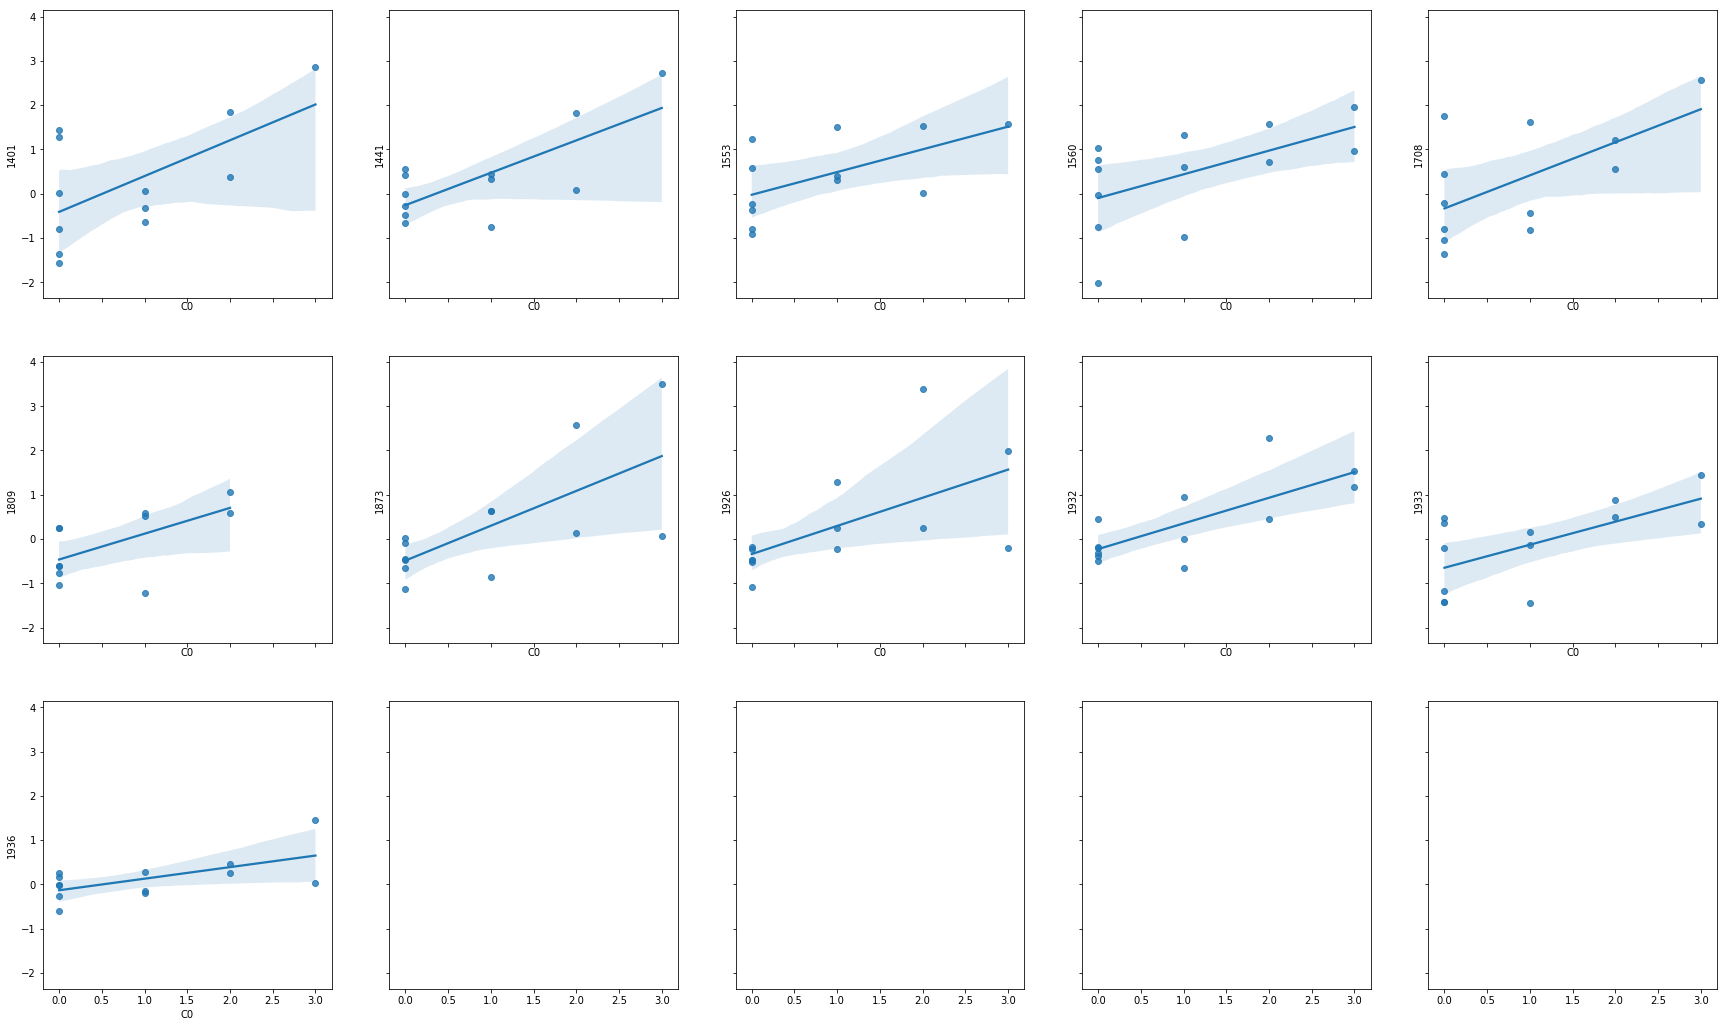

In [64]:
score = 'C0'
meaningful = pearson_zscore[score+'_pval'] < 0.05
r, c = pearson_zscore.loc[meaningful].shape
drug_ids = [str(x) for x in pearson_zscore.loc[meaningful].index]
print(drug_ids)
#print(r)
number_r = int(np.ceil(r / 5))
print(number_r)

def label_point(df,drug_id, ax):
    for i, point in df.iterrows():
        ax.annotate(i, xy = (point['C3'], point[str(drug_id)]),
                    xytext=(2,-2), textcoords="offset points")

fig, axes = plt.subplots(number_r,5, sharex=True, sharey=True, figsize=(30,number_r * 6))
#drug_ids = ['1916', '1924', '2170', '1940']
for idx, ax in enumerate(axes.flat):        
    #print(ax)
    if idx < len(drug_ids):
        sns.regplot(x=tmp_zscore[score], y=tmp_zscore[drug_ids[idx]], ax=ax)
#         label_point(tmp_zscore, drug_ids[idx], ax)
    else:
        break

['1011', '1561']
1


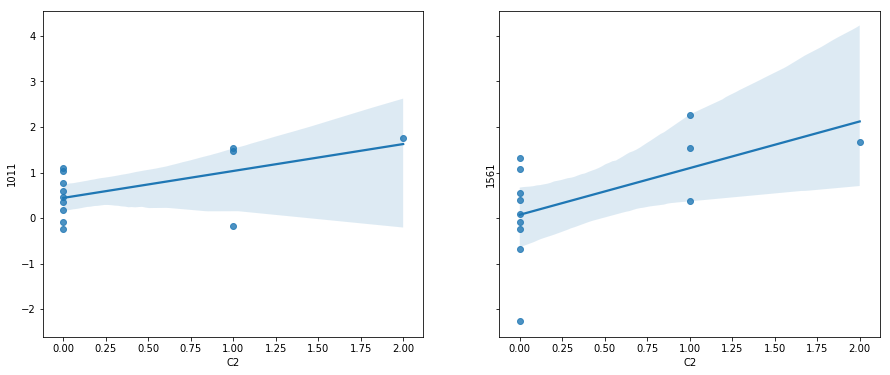

In [67]:
score = 'C2'
meaningful = pearson_zscore[score+'_pval'] < 0.05
r, c = pearson_zscore.loc[meaningful].shape
drug_ids = [str(x) for x in pearson_zscore.loc[meaningful].index]
print(drug_ids)
#print(r)
number_r = int(np.ceil(r / 5))
print(number_r)

def label_point(df,drug_id, ax):
    for i, point in df.iterrows():
        ax.annotate(i, xy = (point['C3'], point[str(drug_id)]),
                    xytext=(2,-2), textcoords="offset points")

fig, axes = plt.subplots(number_r,2, sharex=True, sharey=True, figsize=(15,number_r * 6))
#drug_ids = ['1916', '1924', '2170', '1940']
for idx, ax in enumerate(axes.flat):        
    #print(ax)
    if idx < len(drug_ids):
        sns.regplot(x=tmp_zscore[score], y=tmp_zscore[drug_ids[idx]], ax=ax)
#         label_point(tmp_zscore, drug_ids[idx], ax)
    else:
        break

In [52]:
#print(pivot_pharmaco_profile_ic50.head())
#print(reverse_controllability_cell_line.head())
print(tmp_zscore.head())

           C0  C1  C2  C3  score1  score2      1003      1004      1005  \
cell_line                                                                 
VM-CUB-1    0   4   1   2      -3      -1 -1.216824 -0.354817 -0.974488   
SW1710      2   5   0   2      -8      -3  0.765669 -0.594071  0.944825   
UM-UC-3     3   3   0   3      -3       0 -0.853162 -0.275429 -0.475470   
BFTC-905    1   5   0   4      -3      -1 -1.095495 -1.325191 -1.453189   
HT-1376     3   2   1   4       2       3  2.296610  1.910262  1.296522   

               1006  ...      2046      2047      2048      2096      2106  \
cell_line            ...                                                     
VM-CUB-1  -0.592274  ... -0.816805 -1.364527 -0.101152  0.094931  0.052317   
SW1710     0.564611  ...  0.730938  0.703686  0.778056  0.908491  0.713851   
UM-UC-3    0.370437  ...  0.640175  1.011253 -0.077041  0.749329  0.551245   
BFTC-905  -1.175819  ...  0.172215 -1.135889 -0.951755 -0.989590  0.069339   
HT-137

In [40]:
#interesting_drug_list = [1036, 1084, 1373, 1441, 1512, 1614, 1626, 1786, 1838, 1925, 1936, 1924, 1996]
#cell_ic50 = pd.merge(reverse_controllability_cell_line, pivot_pharmaco_profile_ic50.loc[:, interesting_drug_list], left_index=True, right_index=True)
#cell_auc = pd.merge(reverse_controllability_cell_line, pivot_pharmaco_profile_auc.loc[:, interesting_drug_list], left_index=True, right_index=True)
#cell_zscore = pd.merge(reverse_controllability_cell_line, pivot_pharmaco_profile_zscore.loc[:, interesting_drug_list], left_index=True, right_index=True)

#cell_ic50.to_csv('../bladder_cell_line/blca_ic50.csv')
#cell_auc.to_csv('../bladder_cell_line/blca_auc.csv')
#cell_zscore.to_csv('../bladder_cell_line/blca_zscore.csv')

#print(cell_ic50.head())

In [41]:
# ver1 score = c0 + c1 + 2*c2 + 3*c3
# ver2 score =  -1*c0 + -2*c2 + 2*c2 + 3*c3
# ver3 score = -c1+c2+c3

#pearson_ic50.to_csv('../bladder_cell_line/blca_ccle_corr_pval_ic50_pearson_3.csv')
#kendall_ic50.to_csv('../bladder_cell_line/blca_ccle_corr_pval_ic50_kendall_3.csv')
#spearman_ic50.to_csv('../bladder_cell_line/blca_ccle_corr_pval_ic50_spearman_3.csv')
#pearson_auc.to_csv('../bladder_cell_line/blca_ccle_corr_pval_auc_pearson_3.csv')
#kendall_auc.to_csv('../bladder_cell_line/blca_ccle_corr_pval_auc_kendall_3.csv')
#spearman_auc.to_csv('../bladder_cell_line/blca_ccle_corr_pval_auc_spearman_3.csv')
#pearson_zscore.to_csv('../bladder_cell_line/blca_ccle_corr_pval_zscore_pearson_3.csv')
#kendall_zscore.to_csv('../bladder_cell_line/blca_ccle_corr_pval_zscore_kendall_3.csv')
#spearman_zscore.to_csv('../bladder_cell_line/blca_ccle_corr_pval_zscore_spearman_3.csv')